In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv("../clean_tweet_data.csv")

# Clean Dataframe Exploration

In [117]:
print('Count of rows in the data is:  ', data.shape[0])
print('Count of columns in the data is:  ', data.shape[1])

Count of rows in the data is:   15156
Count of columns in the data is:   18


In [55]:
list(data.columns)

['created_at',
 'source',
 'original_text',
 'clean_text',
 'sentiment',
 'polarity',
 'subjectivity',
 'lang',
 'favorite_count',
 'retweet_count',
 'original_author',
 'followers_count',
 'friends_count',
 'possibly_sensitive',
 'hashtags',
 'user_mentions',
 'place',
 'place_coord_boundaries']

In [56]:
data.groupby(["original_author"]).count().sort_values("original_text", ascending=False)

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
original_author,,,,,,,,,,,,,,,,,
zaizaiUmar,50,50,50,50,50,50,50,50,50,50,50,50,14,22,29,50,0
BirchGold,50,50,50,50,50,50,50,50,50,50,50,50,0,50,0,50,0
GETAnalysis,50,50,50,50,50,50,50,50,50,50,50,50,0,41,1,50,0
Londonwanderer2,50,50,50,50,50,50,50,50,50,50,50,50,28,30,43,0,0
MaatWes,50,50,50,50,50,50,50,50,50,50,50,50,37,9,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZeeOdisha,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0
TNNavbharat,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
TamilsToday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


We can see that the most tweets a single user made are 50 tweets

In [57]:
data[["clean_text", "sentiment"]].groupby(["sentiment"]).count()

,clean_text
sentiment,
-1,6596
0,2696
1,5864


In [60]:
df_pos_neg = data.loc[(data["sentiment"] == 1) | (data["sentiment"] == 0)][["clean_text", "sentiment"]]
df_pos_neg.reset_index(drop=True, inplace=True)
df_pos_neg.head()

,clean_text,sentiment
0,RT the year yield be tell we that there be a h...,1
1,RT German mortgage rate go from to can you hea...,1
2,RT the year mortgage rate in the US rise to it...,1
3,RT buy opportunity like this only occur every ...,0
4,RT welcome to September bond market test what ...,1


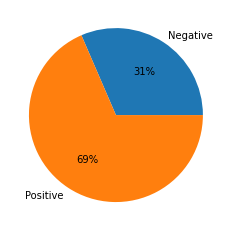

In [62]:
plt.pie(df_pos_neg.groupby(["sentiment"]).size(), labels=["Negative", "Positive"], autopct='%.0f%%')
plt.show()

In [81]:
import nltk
import numpy as np
import sklearn as sk
from wordcloud import WordCloud, STOPWORDS

# Word Cloud for positive tweets

In [98]:
positive_tweets = df_pos_neg.loc[df_pos_neg["sentiment"] == 1]["clean_text"]
positive_tweets.head()

0    RT the year yield be tell we that there be a h...
1    RT German mortgage rate go from to can you hea...
2    RT the year mortgage rate in the US rise to it...
4    RT welcome to September bond market test what ...
5    RT global growth optimism at all time low we s...
Name: clean_text, dtype: object

In [99]:
positive_text = " ".join(positive_tweet for positive_tweet in positive_tweets)

In [105]:
custom_stopwords = ['rt', 'amp']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

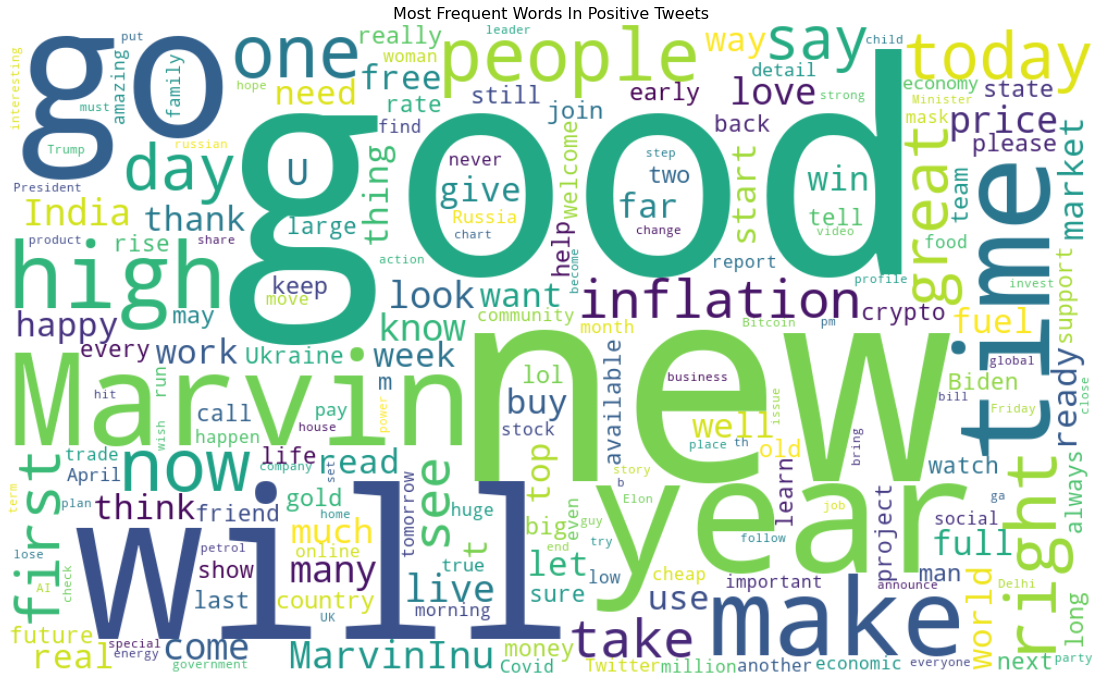

In [110]:
word_cloud = WordCloud(width=1000, height=600, collocations=False, background_color="white", stopwords=STOP_WORDS).generate(positive_text)
plt.figure(figsize=(20, 12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words In Positive Tweets', fontsize=16)
plt.show()

# Word Cloud for negative tweets

In [102]:
negative_tweets = df_pos_neg.loc[df_pos_neg["sentiment"] == 0]["clean_text"]
negative_tweets.head()

3     RT buy opportunity like this only occur every ...
11    RT year mortgage rate above high since the Fed...
13    RT the set up be here if silver be to follow o...
14    RT BREAKING year Treasury yield break another ...
15    RT year of productivity growth datum the post ...
Name: clean_text, dtype: object

In [115]:
negative_text = " ".join(negative_tweet for negative_tweet in negative_tweets)

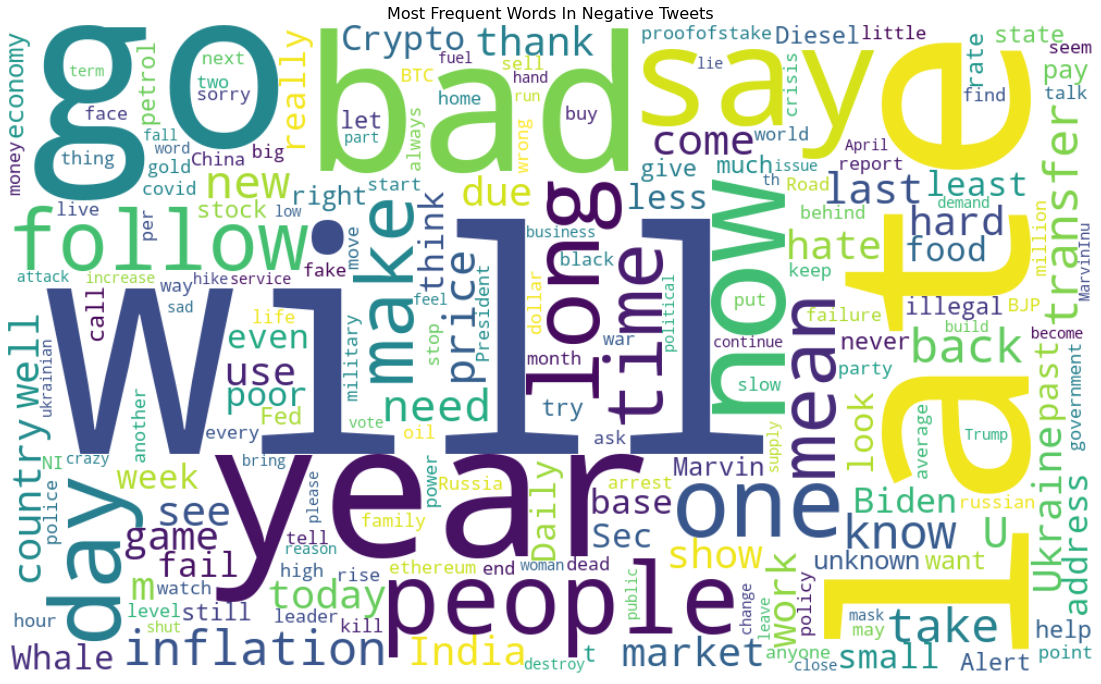

In [109]:
negative_word_cloud = WordCloud(width=1000, height=600, collocations=False, background_color="white", stopwords=STOP_WORDS).generate(negative_text)
plt.figure(figsize=(20, 12))
plt.imshow(negative_word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words In Negative Tweets', fontsize=16)
plt.show()

# Word Cloud for all tweets

In [116]:
all_text = " ".join(tweet for tweet in data["clean_text"])
len(all_text)

1237836

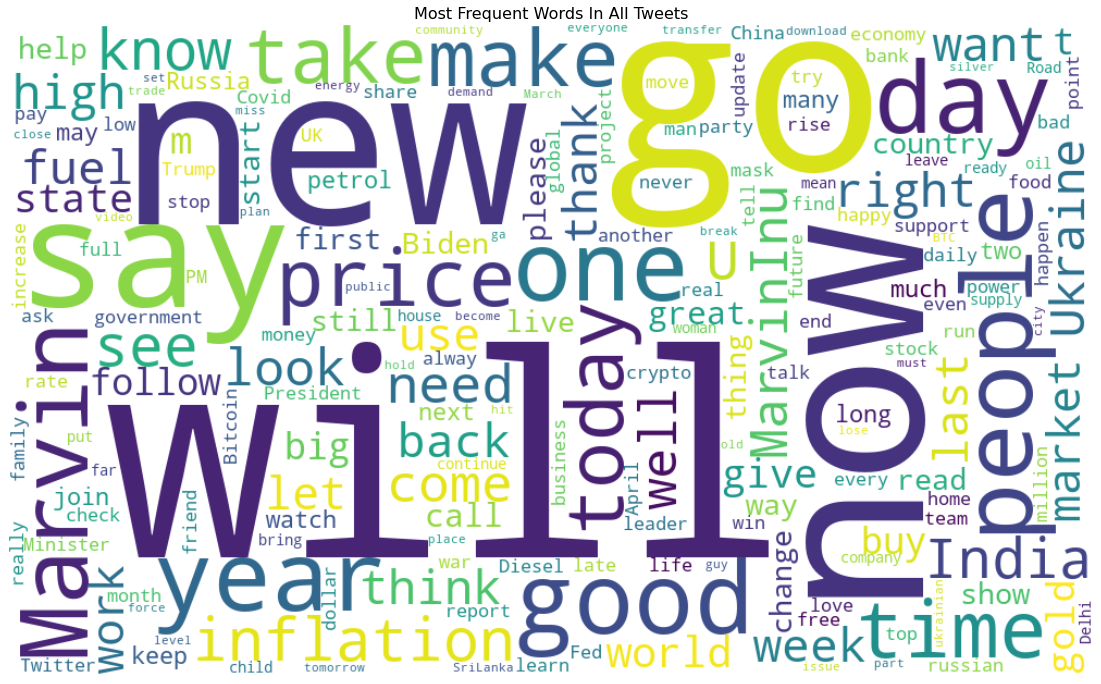

In [112]:
all_word_cloud = WordCloud(width=1000, height=600, collocations=False, background_color="white", stopwords=STOP_WORDS).generate(all_text)
plt.figure(figsize=(20, 12))
plt.imshow(
    all_word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Words In All Tweets', fontsize=16)
plt.show()